# Data Cleaning

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib as plt
import seaborn as sns

In [7]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [8]:
!ls data

archive                    only_dead.xlsx
game-of-thones-deaths.xlsx


## Game of thrones deaths

https://www.kaggle.com/datasets/shitalgaikwad123/gameofthonesdeaths

In [15]:
only_deaths = pd.read_excel('data/only_dead.xlsx', skiprows=1)

In [16]:
only_deaths

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,2,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,None,4,1,Direwolf,None,Winterfell,Teeth,Stag,1
4,None,5,1,Stag,None,Winterfell,Antler,Direwolf,1
...,...,...,...,...,...,...,...,...,...
2219,None,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2220,None,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2221,None,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2222,None,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


In [28]:
only_deaths_shape = only_deaths.shape
only_deaths_shape

(2224, 9)

In [26]:
only_deaths_cols = only_deaths.columns
only_deaths_cols

Index(['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
       'Location', 'Method', 'Name', 'Season'],
      dtype='object')

In [30]:
only_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Allegiance     2224 non-null   object
 1   Death No.      2224 non-null   int64 
 2   Episode        2224 non-null   int64 
 3   Killer         2224 non-null   object
 4   Killers House  2224 non-null   object
 5   Location       2224 non-null   object
 6   Method         2224 non-null   object
 7   Name           2224 non-null   object
 8   Season         2224 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 156.5+ KB


In [32]:
only_deaths.duplicated().sum()

0

In [34]:
only_deaths.isna().sum()

Allegiance       0
Death No.        0
Episode          0
Killer           0
Killers House    0
Location         0
Method           0
Name             0
Season           0
dtype: int64

In [43]:
for col in only_deaths_cols:
    print(col,'   nunique:',len(only_deaths[col].value_counts()))
    print('/n')
    print(only_deaths[col].value_counts())
    print('/n')

Allegiance    nunique: 41
/n
House Lannister                      835
None                                 432
House Stark                          121
Free Folk                            121
Night's Watch                         79
House Bolton                          68
Sons of the Harpy                     68
House Targaryen                       68
House Baratheon of Dragonstone        67
House Frey                            62
Faith Militant                        52
Smallfolk                             44
House Greyjoy                         41
Dothraki                              23
House Baratheon of King's Landing     22
The Masters                           14
The Thirteen                          12
Wise Masters                          12
Brotherhood Without Banners           10
House Mormont                          8
House Martell                          8
Good Masters                           7
House Baelish                          6
Great Masters               

In [44]:
only_deaths_cols

Index(['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
       'Location', 'Method', 'Name', 'Season'],
      dtype='object')

In [45]:
only_deaths_shape

(2224, 9)

In [71]:
#get rows that have "King's Landing" on name
only_deaths['Name'].str.contains("King's Landing").sum()


389

In [109]:
only_deaths_cols = only_deaths.columns

In [111]:
only_deaths_cols_without_deathno = only_deaths_cols.copy().to_list()


In [112]:
only_deaths_cols_without_deathno

['Allegiance',
 'Death No.',
 'Episode',
 'Killer',
 'Killers House',
 'Location',
 'Method',
 'Name',
 'Season']

In [114]:
only_deaths_cols_without_deathno.remove('Death No.')

In [115]:
only_deaths_cols

Index(['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
       'Location', 'Method', 'Name', 'Season'],
      dtype='object')

In [116]:
only_deaths_cols_without_deathno

['Allegiance',
 'Episode',
 'Killer',
 'Killers House',
 'Location',
 'Method',
 'Name',
 'Season']

In [121]:
only_deaths.duplicated(subset=only_deaths_cols_without_deathno).sum()

1737

In [124]:
only_deaths.shape

(2224, 9)

In [125]:
only_deaths_wo_deathno = only_deaths.drop('Death No.',axis=1)

In [129]:
only_deaths_wo_deathno.duplicated().sum()

1737

In [130]:
2224-1737

487

## Character-deaths 
https://www.kaggle.com/datasets/mylesoneill/game-of-thrones/data


two datasets: 
- character-deaths.csv
- **character-predictions.csv --> death until season 4**

### character-deaths.csv

In [17]:
char_deaths = pd.read_csv('data/archive/character-deaths.csv')

In [18]:
char_deaths

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [51]:
char_deaths.shape

(917, 13)

In [208]:
char_deaths.isna().sum()

Name                    0
Allegiances             0
Death Year            612
Book of Death         610
Death Chapter         618
Book Intro Chapter     12
Gender                  0
Nobility                0
GoT                     0
CoK                     0
SoS                     0
FfC                     0
DwD                     0
dtype: int64

### character-predictions.csv

The **‘actual’** column contains the life or death state of the characters in the books.

The **‘pred’** column contains the prediction of whether a character will live or die.

The **‘alive’** column contains the probability of a character to stay alive.

The **‘plod’** column contains the probability of a character’s death.

In [210]:
char_preds = pd.read_csv('data/archive/character-predictions.csv')

In [144]:
char_preds_cols = char_preds.columns
char_preds_cols

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'DateoFdeath',
       'mother', 'father', 'heir', 'house', 'spouse', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather',
       'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity',
       'isAlive'],
      dtype='object')

In [161]:
char_preds

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


In [211]:
char_preds_droped_cols=['S.No', 'pred', 'actual','alive','plod']

In [143]:
char_preds_shape = char_preds.shape
char_preds_shape

(1946, 28)

In [145]:
char_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1946 non-null   object 
 1   title              938 non-null    object 
 2   male               1946 non-null   int64  
 3   culture            677 non-null    object 
 4   dateOfBirth        433 non-null    float64
 5   DateoFdeath        444 non-null    float64
 6   mother             21 non-null     object 
 7   father             26 non-null     object 
 8   heir               23 non-null     object 
 9   house              1519 non-null   object 
 10  spouse             276 non-null    object 
 11  book1              1946 non-null   int64  
 12  book2              1946 non-null   int64  
 13  book3              1946 non-null   int64  
 14  book4              1946 non-null   int64  
 15  book5              1946 non-null   int64  
 16  isAliveMother      21 no

In [212]:
char_preds_droped_cols = char_preds_droped_cols + ['isPopular','culture','dateOfBirth','DateoFdeath', 'age', 'title','mother','father','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse']

In [213]:
char_preds.drop(labels=char_preds_droped_cols, axis=1, inplace=True)

In [214]:
char_preds.duplicated().sum()

0

** Deleted: culture,dateOfBirth,DateoFdeath,age**

We could keep them only if the webscrapping can fill the NAs

Feature               NAs

culture              1269

dateOfBirth          1513

DateoFdeath          1502

age                  1513

We leave the culture for the age character history but not for the model prediction

In [215]:
#char_preds.culture.value_counts()

In [216]:
char_preds.house.value_counts()

Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
House Lannister     49
                  ... 
House Gower          1
House Borrell        1
Citadel              1
Wise Masters         1
Three-eyed crow      1
Name: house, Length: 347, dtype: int64

In [217]:
char_preds["house"]=char_preds["house"].fillna("No house")

In [218]:
char_preds.isna().sum()

name                 0
male                 0
house                0
book1                0
book2                0
book3                0
book4                0
book5                0
isMarried            0
isNoble              0
numDeadRelations     0
boolDeadRelations    0
popularity           0
isAlive              0
dtype: int64

<AxesSubplot:>

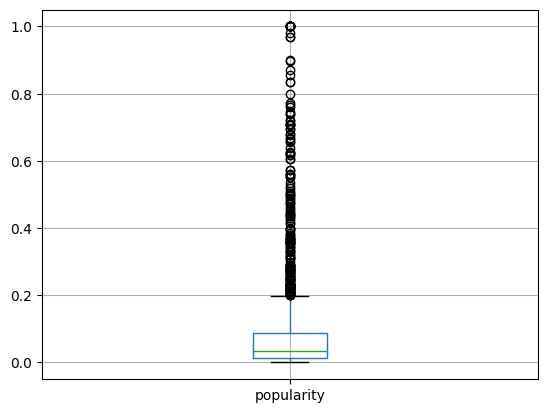

In [246]:
char_preds.boxplot("popularity")

<AxesSubplot:>

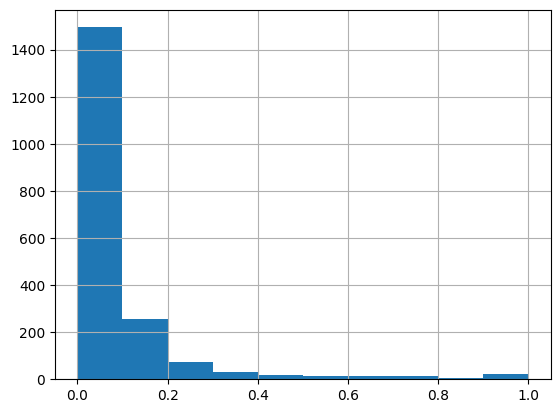

In [222]:
char_preds.popularity.hist()

In [225]:
#char_preds.to_csv('data/20231127_char_pred.csv')  

In [227]:
#!ls data

20231127_char_pred.csv     game-of-thones-deaths.xlsx
archive                    only_dead.xlsx


In [229]:
char_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1946 non-null   object 
 1   male               1946 non-null   int64  
 2   house              1946 non-null   object 
 3   book1              1946 non-null   int64  
 4   book2              1946 non-null   int64  
 5   book3              1946 non-null   int64  
 6   book4              1946 non-null   int64  
 7   book5              1946 non-null   int64  
 8   isMarried          1946 non-null   int64  
 9   isNoble            1946 non-null   int64  
 10  numDeadRelations   1946 non-null   int64  
 11  boolDeadRelations  1946 non-null   int64  
 12  popularity         1946 non-null   float64
 13  isAlive            1946 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 213.0+ KB


In [231]:
char_preds.male.value_counts()

1    1205
0     741
Name: male, dtype: int64

In [232]:
char_preds.house.value_counts()

No house           427
Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
                  ... 
House Gower          1
House Borrell        1
Citadel              1
Wise Masters         1
Three-eyed crow      1
Name: house, Length: 348, dtype: int64

In [233]:
char_preds.book1.value_counts()

0    1560
1     386
Name: book1, dtype: int64

In [234]:
char_preds.book2.value_counts()

0    1217
1     729
Name: book2, dtype: int64

In [235]:
char_preds.book3.value_counts()

0    1011
1     935
Name: book3, dtype: int64

In [236]:
char_preds.book4.value_counts()

1    1152
0     794
Name: book4, dtype: int64

In [237]:
char_preds.book5.value_counts()

0    1177
1     769
Name: book5, dtype: int64

In [240]:
char_preds.isAlive.value_counts()/len(char_preds)

1    0.745632
0    0.254368
Name: isAlive, dtype: float64

In [241]:
char_preds.numDeadRelations.value_counts()

0     1801
1       49
5       25
4       18
2       12
7       10
6        8
10       5
8        5
3        4
11       3
12       2
15       2
9        2
Name: numDeadRelations, dtype: int64

<AxesSubplot:>

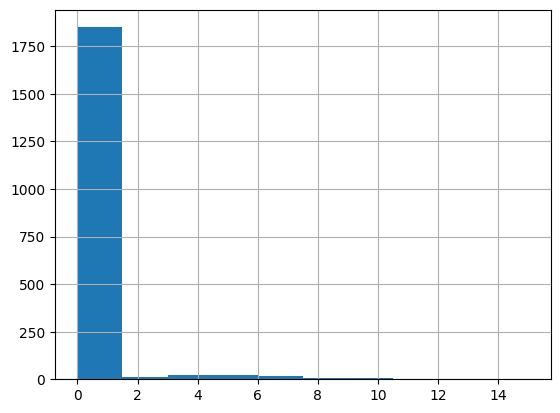

In [242]:
char_preds.numDeadRelations.hist()

<AxesSubplot:>

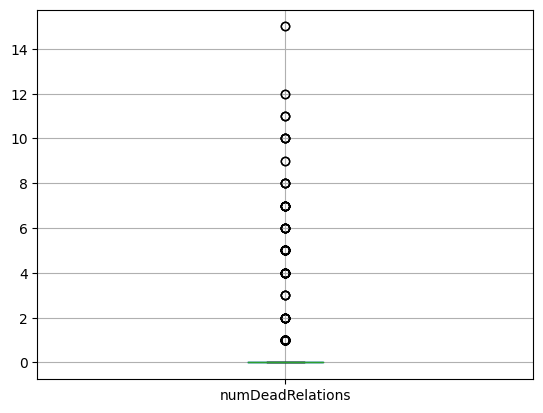

In [247]:
char_preds.boxplot("numDeadRelations")

### Getting alliance column from only_deaths.Allegiance to char_preds for each row by name

In [248]:
only_deaths.Name

0                 Waymar Royce
1                        Gared
2                         Will
3                         Stag
4                     Direwolf
                 ...          
2219    King's Landing Citizen
2220    King's Landing Citizen
2221    King's Landing Citizen
2222    King's Landing Citizen
2223        Daenerys Targaryen
Name: Name, Length: 2224, dtype: object

In [ ]:
df["exists"] = data.drop("name", 1).isin(df["target"]).any(1)